# Model Development on Mobile Images


In [146]:
# import libraries for data processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.figure as matfig

# import libraries for image processing and system configuration
import io
import requests
import cv2
from PIL import Image

In [12]:
# import tensorflow
import tensorflow as tf

In [13]:
# import scikit learn dependencies
from sklearn.preprocessing import LabelEncoder

In [14]:
# import tensorflow for building neural network
from tensorflow import keras
from keras import models
from keras import layers
from keras import utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Model Development Approach

+ Load Images from Directory
+ Image Data Preparation
+ Model Building
+ Model Training
+ Model Evaluation

## Data Augmentation

In [180]:
# load images from directory mobile_images
mob_img_dir = "D:/Machine_Learning/Portfolio_Project_Machine_Learning/Mobile_Image_Classification/mobile_phone_images"

# set size + batch size of image
image_size = (128, 128)
batch_size = 32

## Model Training

Procedure for building image classification model to train and develop the model on mobile images using mobile labels:
+ prepare training samples and labels for model training
+ build a convolutional neural network from TensorFlow
+ train the model on mobile images with 10 epochs
+ evaluate the images + 
+ graphically analyse the loss and the accuracy of the training process

In [181]:
# creating data generator for augmenting image data
val_split = 0.2
img_gen = ImageDataGenerator(validation_split=val_split)

In [182]:
# load training set
train_ds = img_gen.flow_from_directory(
  mob_img_dir, 
  target_size=image_size,
  batch_size=batch_size, 
  class_mode="categorical",
  subset="training"
)

Found 29 images belonging to 9 classes.


In [183]:
val_ds = img_gen.flow_from_directory(
  mob_img_dir,
  seed=123,
  target_size=image_size,  
  batch_size=batch_size,
  class_mode="categorical",
  subset="validation")

Found 5 images belonging to 9 classes.


In [184]:
# create constant for visualising image data: class names + train set
images, labels = next(train_ds)
class_names = list(train_ds.class_indices.keys())

In [185]:
# retrieve size of the train set and validation set
train_size = train_ds.target_size
print(f"Size of Training set: {train_size}")

Size of Training set: (128, 128)


In [186]:
class_names

['fairphone',
 'iphone',
 'mobile_images',
 'motorola',
 'nokia',
 'oneplus',
 'pixel_8',
 'samsung',
 'xiaomi']

## Mobile Image Visualisation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB dat

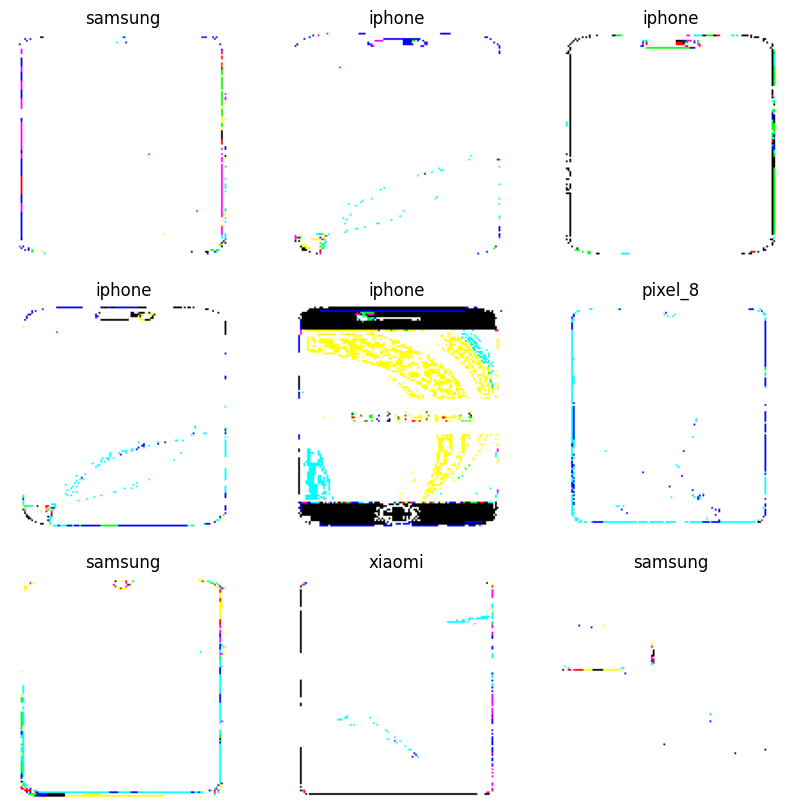

In [195]:
# Visualize images from the training dataset
plt.figure(figsize=(10, 10))


# Take one batch of data
for i in range(9):  # Display 9 images
    ax = plt.subplot(3, 3, i + 1)  # Create a 3x3 grid
    plt.imshow(images[i])
    plt.title(class_names[labels[i].argmax()])  # Use the class name from class_indices
    plt.axis("off")  # Remove the axis

## Model Building

Building convolutional neural network: 
+ 1x rescale layer
+ 3x convolutional 2D layer
+ 2x maxpooling 2D layer
+ 1x flatten layer
+ 1x dense layer

Optimizer: Adam
Loss: Sparse Crossentropy for multiclassification problem

In [188]:
# troubleshooting: input, output
input_var = train_ds
output_var = class_names

print(input_var.target_size)
print(len(output_var))

(128, 128)
9


In [189]:
# build convolutional neural network model 
def convolutional_neural_network(num_labels): 
  # define a cnn model
  model = models.Sequential()

  # Add a rescaling layer to normalize pixel values
  rescale_ratio = 1./255
  model.add(layers.Rescaling(rescale_ratio, input_shape=(128, 128, 3)))

  # add convolutional layer, followed by a max-pooling layers
  model.add(layers.Conv2D(32, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(64, (3,3), activation="relu"))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(128, (3,3), activation="relu"))
  
  # flatten 3D features into 1D to connect dense layers
  model.add(layers.Flatten())

  # add dense layers
  model.add(layers.Dense(128, activation="relu"))
  model.add(layers.Dense(num_labels, activation="softmax"))

  # compile the model 
  model.compile(optimizer="adam",
                loss="categorical_crossentropy",
                metrics=["accuracy"])
  return model 

In [190]:
# build a convolutional neural network model
cnn_model = convolutional_neural_network(len(class_names))

In [191]:
# train the cnn model 
epochs = 12
model_history = cnn_model.fit(train_ds,
                              validation_data=val_ds,
                              epochs=epochs) 

Epoch 1/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0690 - loss: 2.1701 - val_accuracy: 0.4000 - val_loss: 1.3218
Epoch 2/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step - accuracy: 0.4138 - loss: 3.4131 - val_accuracy: 0.6000 - val_loss: 3.2498
Epoch 3/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step - accuracy: 0.4138 - loss: 6.2237 - val_accuracy: 0.6000 - val_loss: 0.7341
Epoch 4/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - accuracy: 0.4828 - loss: 1.1543 - val_accuracy: 0.4000 - val_loss: 1.6471
Epoch 5/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.4828 - loss: 1.1143 - val_accuracy: 0.4000 - val_loss: 1.3674
Epoch 6/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 0.8276 - loss: 0.8681 - val_accuracy: 0.6000 - val_loss: 0.9470
Epoch 7/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 0.5172 - loss: 1.0763 - val_accuracy: 0.4000 - val_loss: 1.7446
Epoch 8/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.7586 - loss: 0.6324 - val_accuracy: 0.4000 - val_loss: 1.

In [192]:
# define function --> visualise the accuracy and validation of the model
def model_performance_vis(epochs, train, validation,target ,ax): 
  # plt.figure(figsize=(14, 7))
  # plot graph for determining accuracy and loss
  ax.plot(epochs, train, "o-"  ,label="Training", color="black")
  ax.plot(epochs, validation, "o-",label="Validation")

  # add graph details
  ax.set_xlabel("Epochs")
  ax.set_ylabel(target)

  ax.set_title(f"{target} Diagram")
  plt.legend()

  return ax


C:\Users\mian_\AppData\Local\Temp\ipykernel_27408\2734462266.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


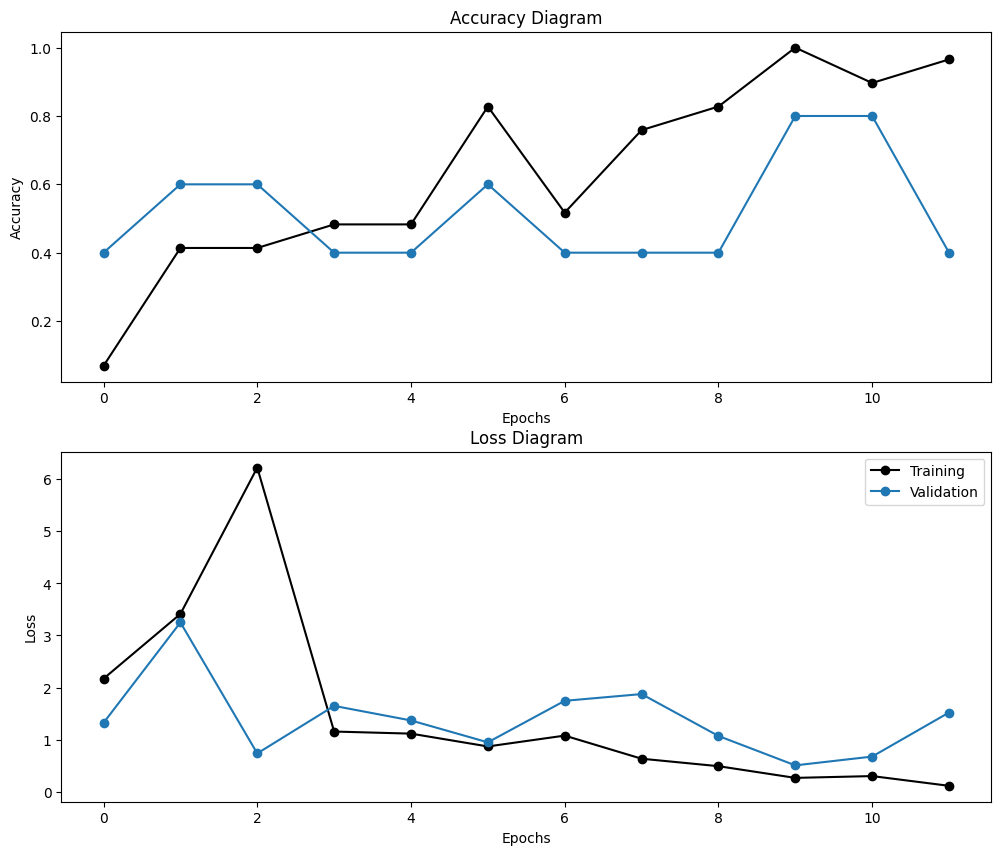

In [193]:
# visualise model's performance 
fig, graph = plt.subplots(2,1, figsize=(12, 10))
# training set
num_epochs = model_history.epoch
train_acc = model_history.history["accuracy"]
train_loss = model_history.history["loss"]

# validation set
val_acc = model_history.history["val_accuracy"]
val_loss = model_history.history["val_loss"]

graph1 = model_performance_vis(num_epochs, train_acc, val_acc, "Accuracy", ax=graph[0])
graph2 = model_performance_vis(num_epochs, train_loss, val_loss, "Loss", ax=graph[1])

### Model Evaluation